# Summary

**Index**

1. [Introduction](#introduction)
2. [Dataset description](#dataset-description)
3. [Cleaning data](#cleaning-data)
4. [EDA](#eda)
5. [Split and modeling](#split-and-modeling)

    [Training models using Machine Learning](#training-models-using-machine-learning)

    [Optimization and evaluation of the model](#optimization-and-evaluation-of-the-model)
6. [Conclusion](#conclusion)

### Introduction

Heart disease prevention is a critical issue in public health. Cardiovascular diseases are one of the leading causes of mortality worldwide, and their prevention can save countless lives. In this project, a machine learning model has been developed to help predict the likelihood of having heart disease based on various health indicators. This document details the model development process, from data cleaning and exploratory analysis to model optimization and evaluation.

### Dataset description

The dataset used in this project comes from medical records that include various attributes relevant to predicting heart disease. These attributes include age, cholesterol levels, maximum heart rate, and other factors. 

The data was obtained from two Kaggle datasets:

* **heart_disease_uci.csv**  
Source 1: [Kaggle](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)

* **heart.csv**  
Source 2: [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data)


### Cleaning data

Data cleaning is a crucial step in any machine learning project. At this stage, missing values are handled, data errors are corrected, and the data is prepared for analysis.  
All the code used for data cleaning can be found here: [01_Cleaning.ipynb](https://github.com/BrendzRdgz/Proyecto_ML/blob/main/process/01_Cleaning.ipynb).

The following steps were followed: 
1. Import data
2. Column identification and nomenclature
3. Renaming columns in dataset 1 to match with dataset 2
4. Standardizing values of multiples columns to match
5. Deletion of nulls
6. Merging datasets by deleting columns of dataset 1 with values different from dataset 2
7. Exporting the dataset as a CSV named: 'data_final.csv'


### EDA

Exploratory Data Analysis (EDA) helps to better understand the data and identify patterns and relationships among attributes. This section presents graphs and statistics that illustrate the key characteristics of the dataset..  
The EDA can be found here: [02_EDA.ipynb](https://github.com/BrendzRdgz/Proyecto_ML/blob/main/process/02_EDA.ipynb).

For the EDA, the 'data_final.csv' file was used.

The most important findings from the EDA are as follows: 
1. The target variable ('HeartDisease') is not completely imbalanced. 53% of cases have heart disease, compared to 46% that do not.  
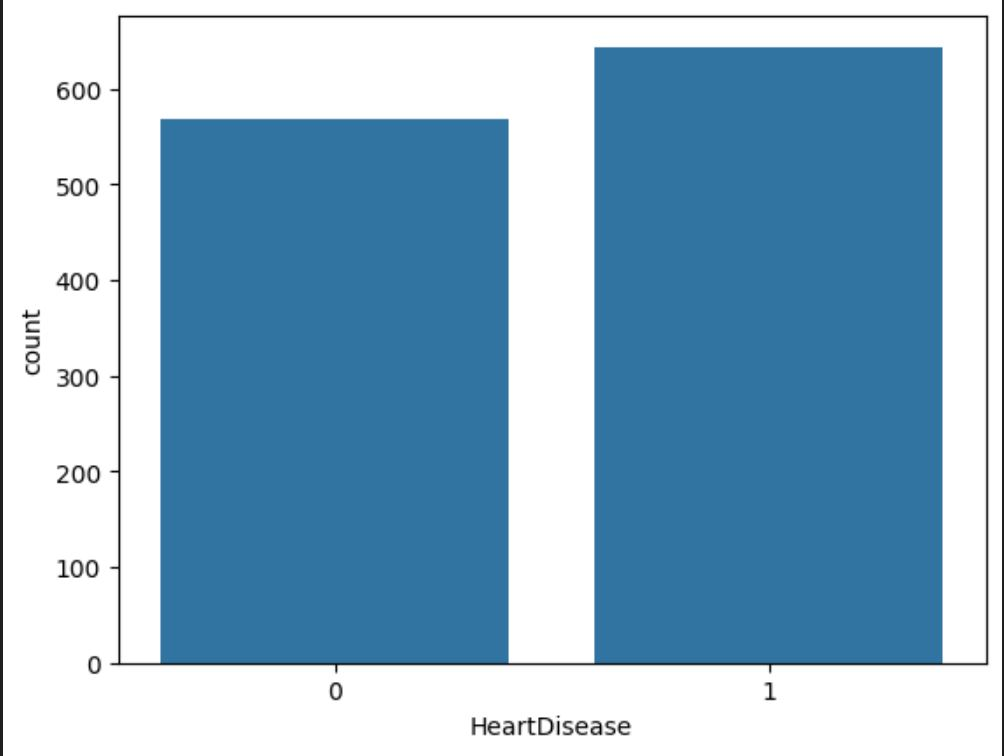

2. In the univariate analysis of numerical variables, the following stands out:
- Age: The highest number of patients is between 50 and 65 years old.
- Cholesterol: There are many outliers at the end and a large number of cases with 0 cholesterol, suggesting it might be used as a synonym for N/A.
- Oldpeak: There are negative and high outliers.
- RestingBP: There is a long tail at the lower values and outliers at the higher values.
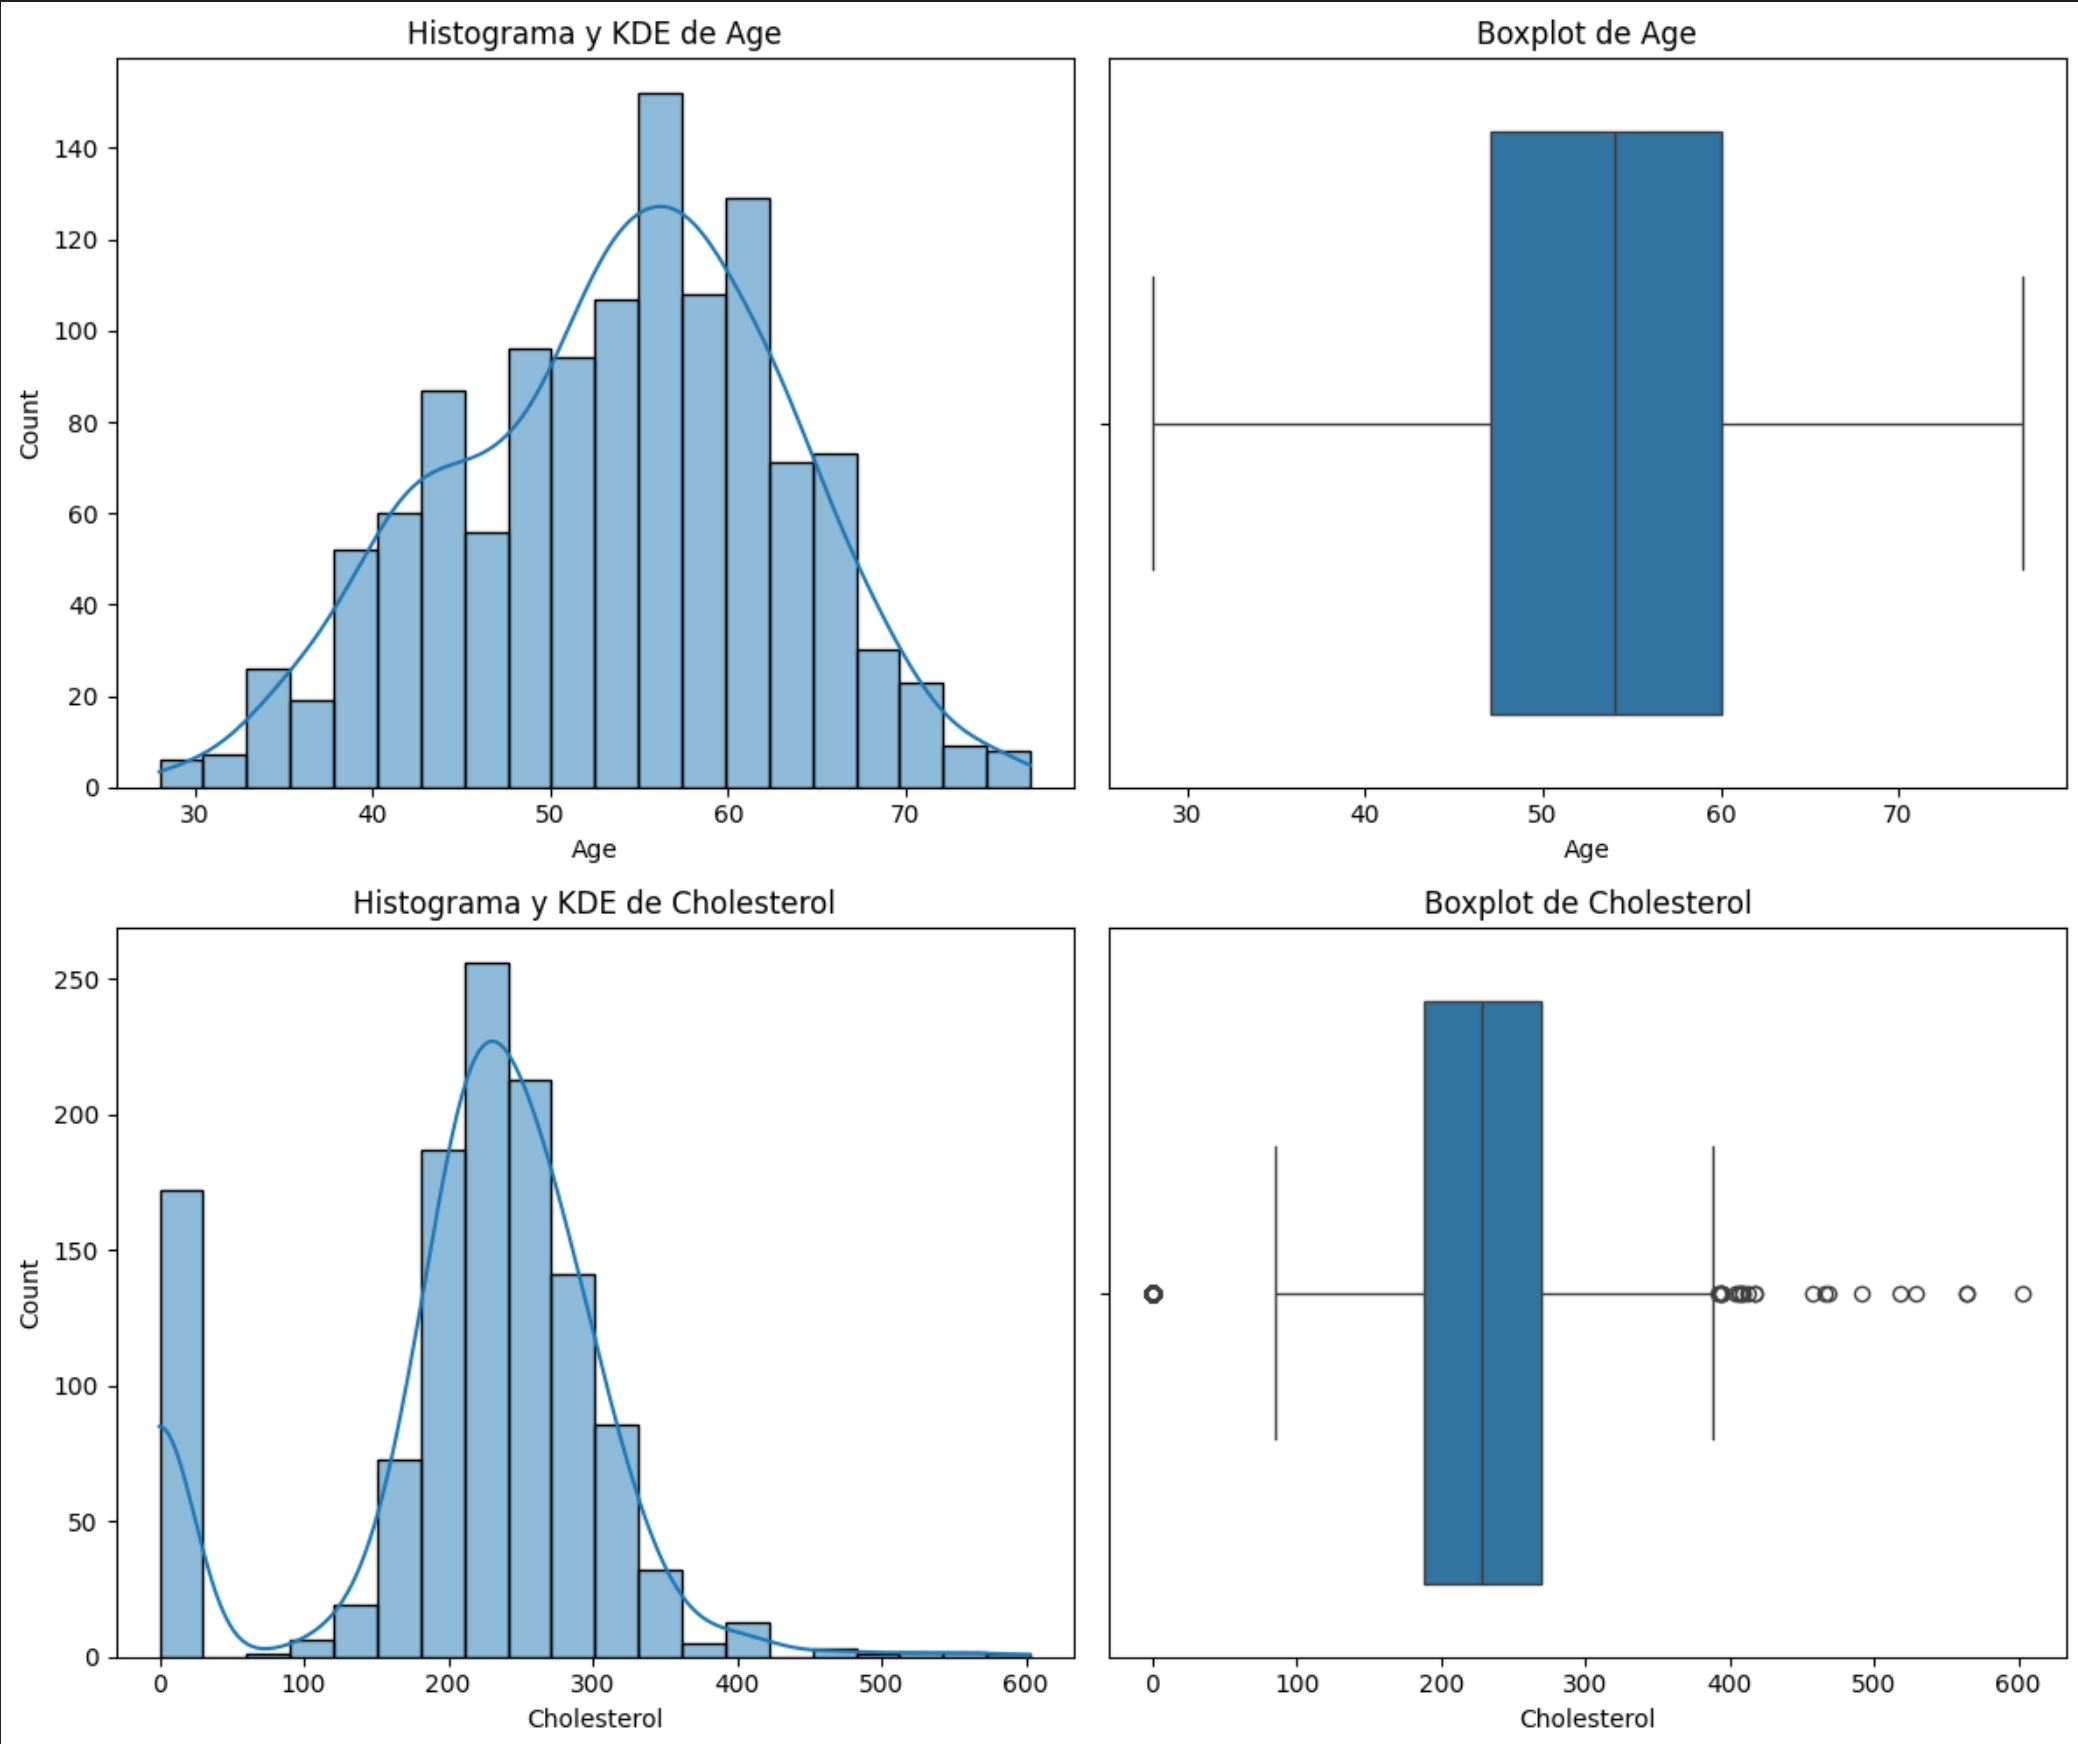
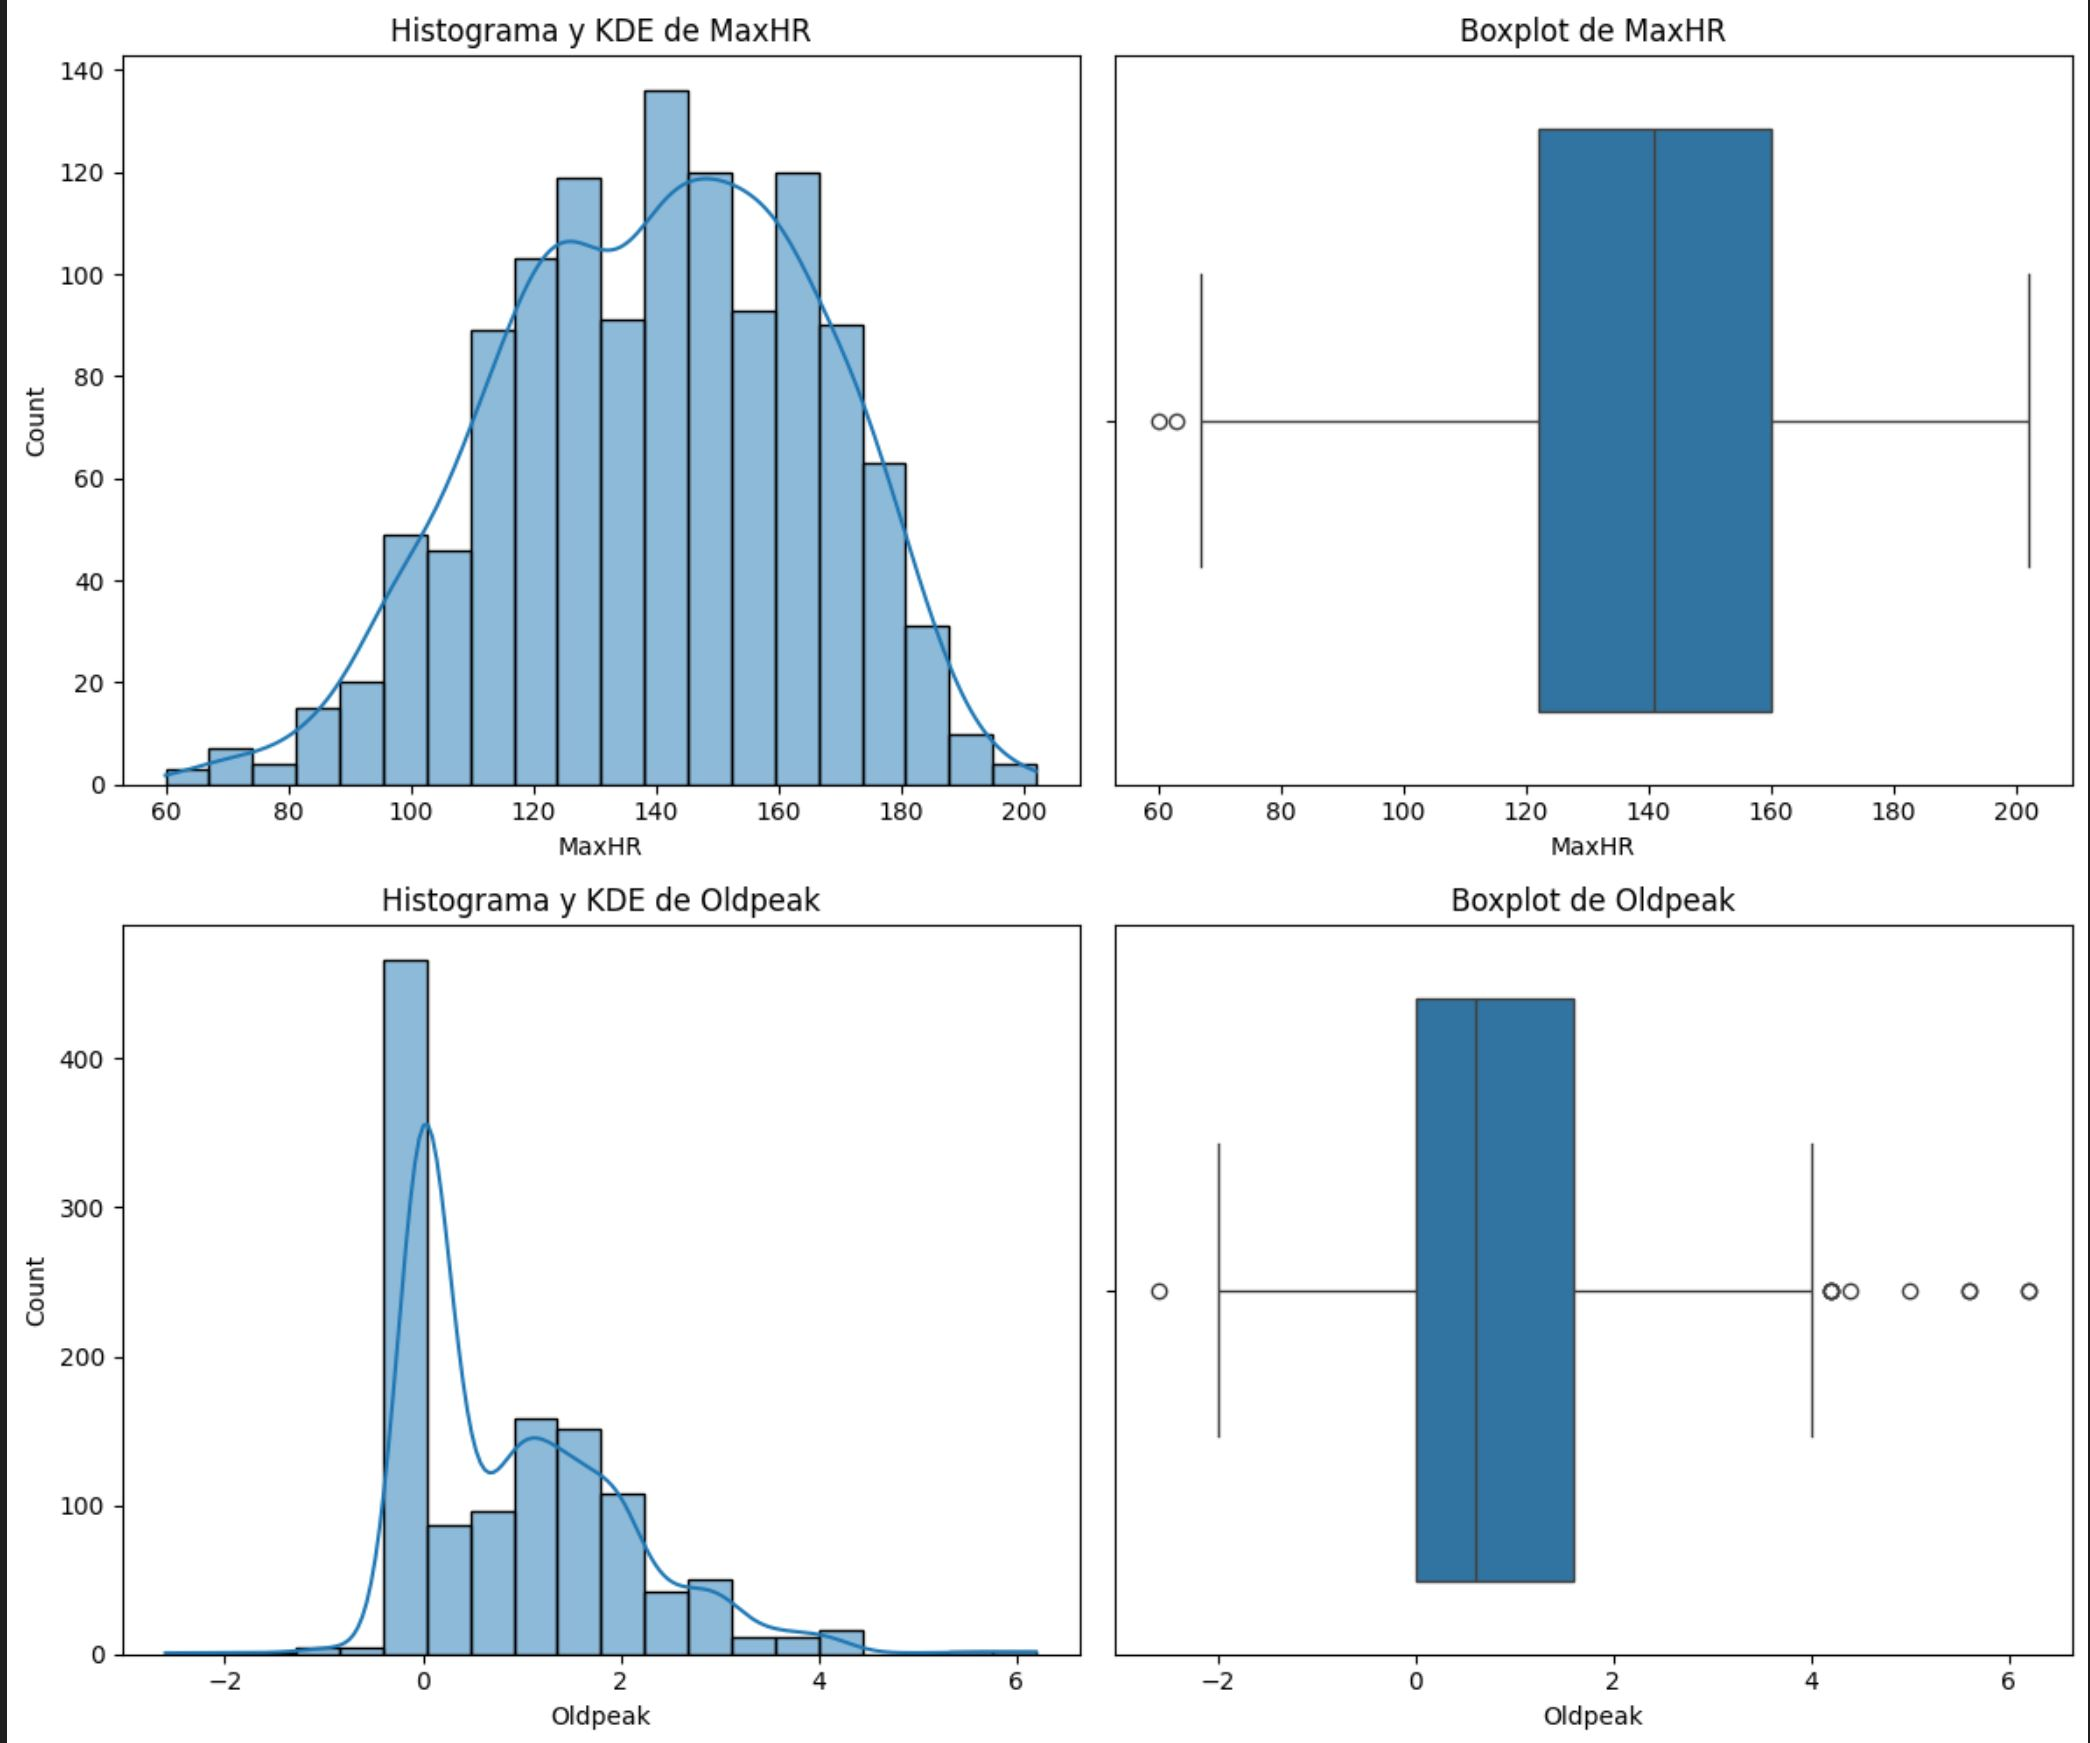
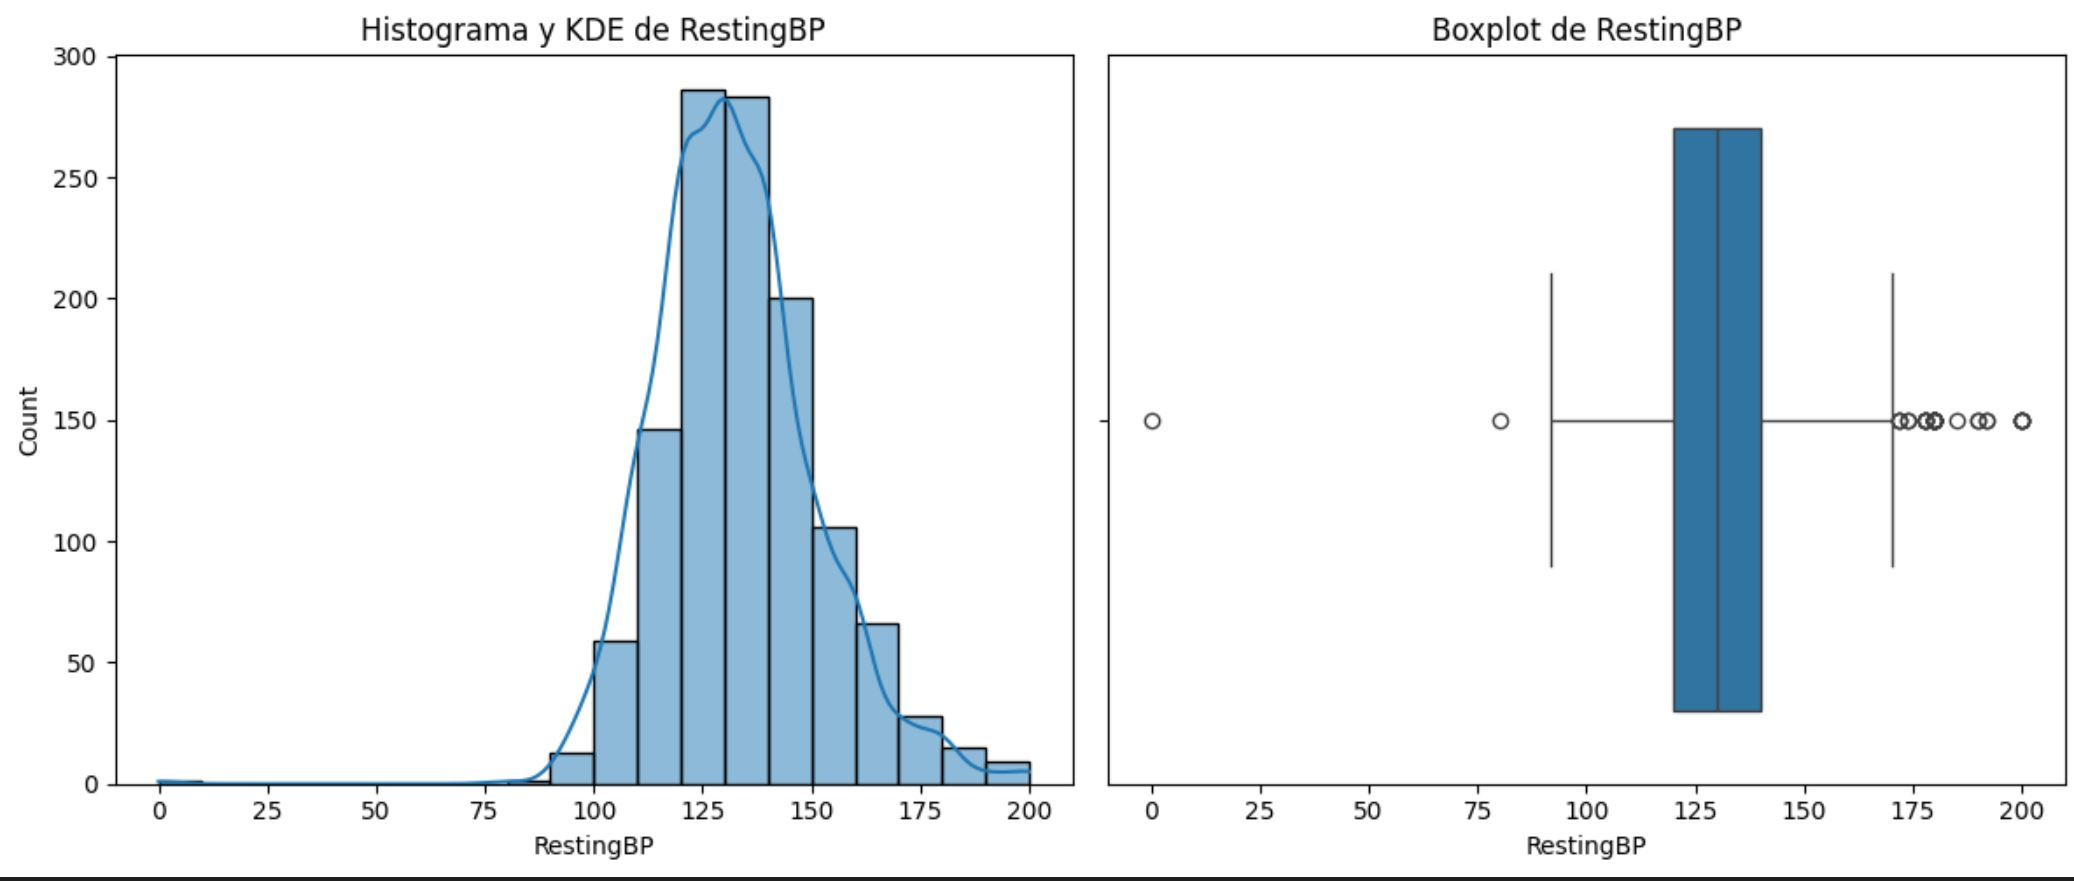

Since outliers are significant in this dataset, I decided to keep them.  
However, I replaced 172 zero values in the Cholesterol column with the median to distribute the data more evenly.

3. In the univariate analysis of categorical variables, the following is observed:
- ChestPainType: The category with the fewest cases is TA (Typical Angina) with 6%.
- ExerciseAngina: Exercise-induced angina occurs in 39% of cases (True).
- Fasting Blood Sugar: 79% are False and 21% are True.
- RestingECG: Normal ECG in 58%, LV hypertrophy in 28%, and ST abnormality in 15%.
- ST_Slope: The slope of the peak exercise ST segment is Flat in 49%, Upsloping in 44%, and Downsloping in 7%.
- Sex: The number of female patients (24%) is much lower than the number of male patients (76%).
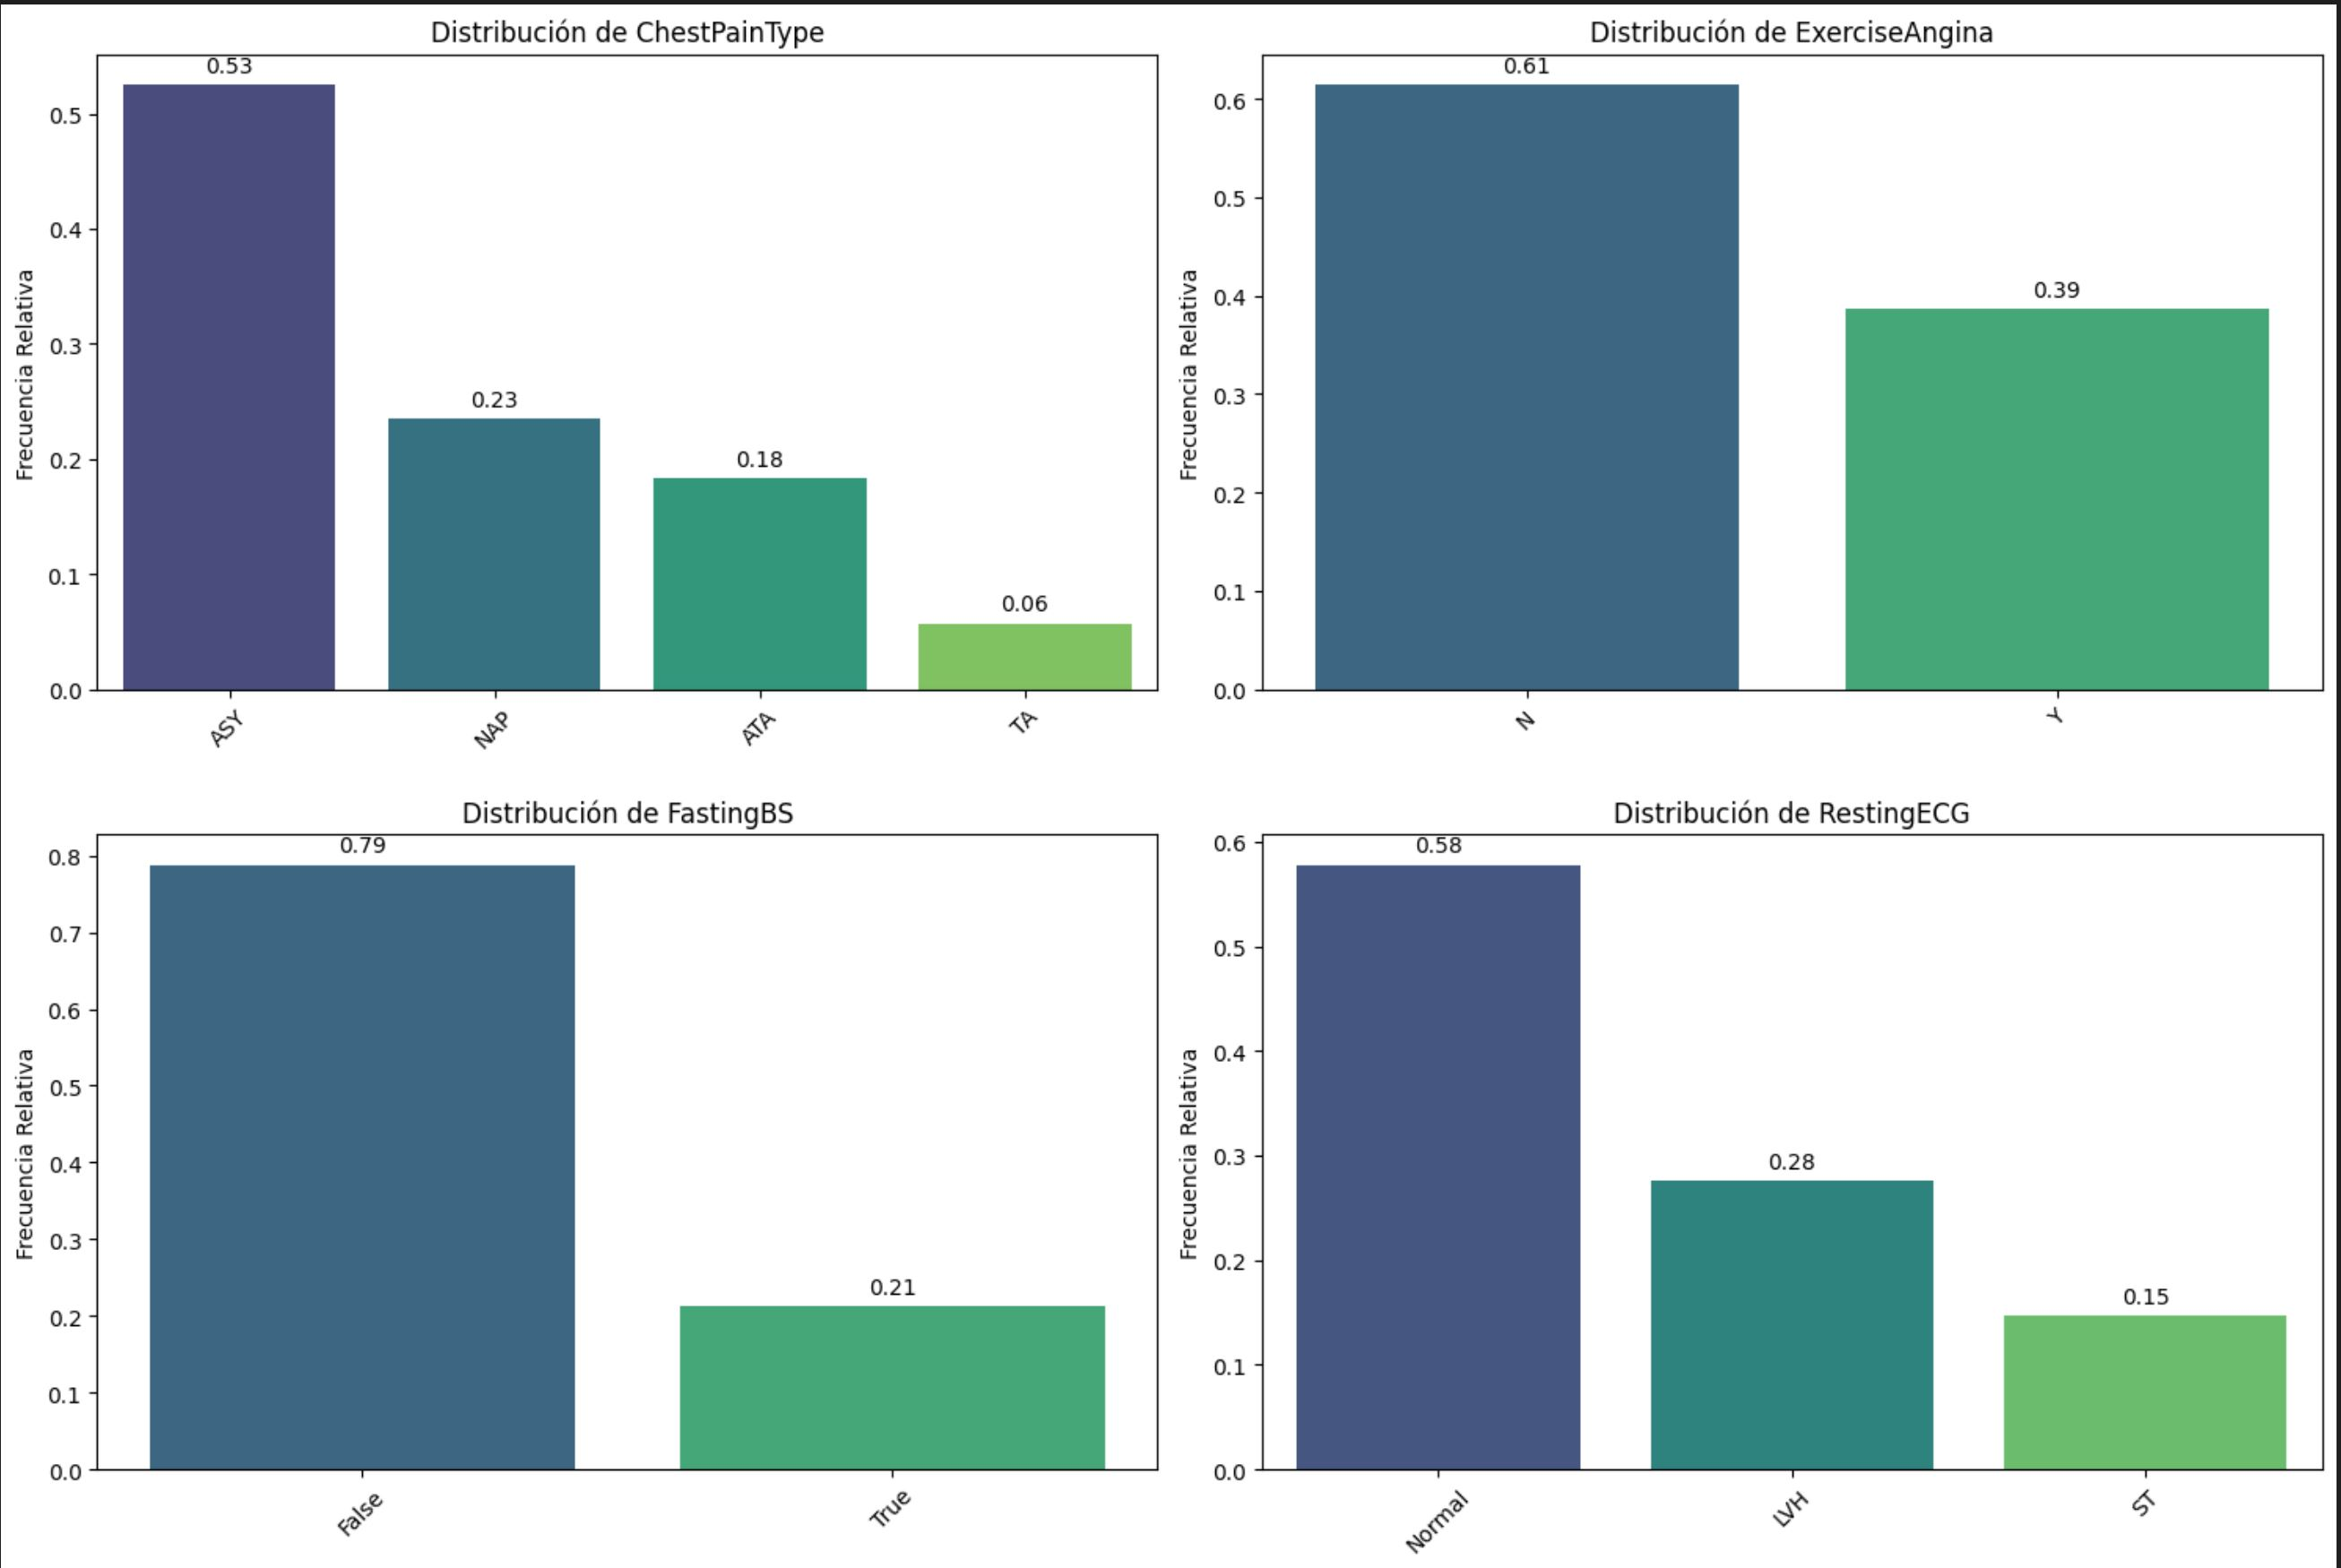
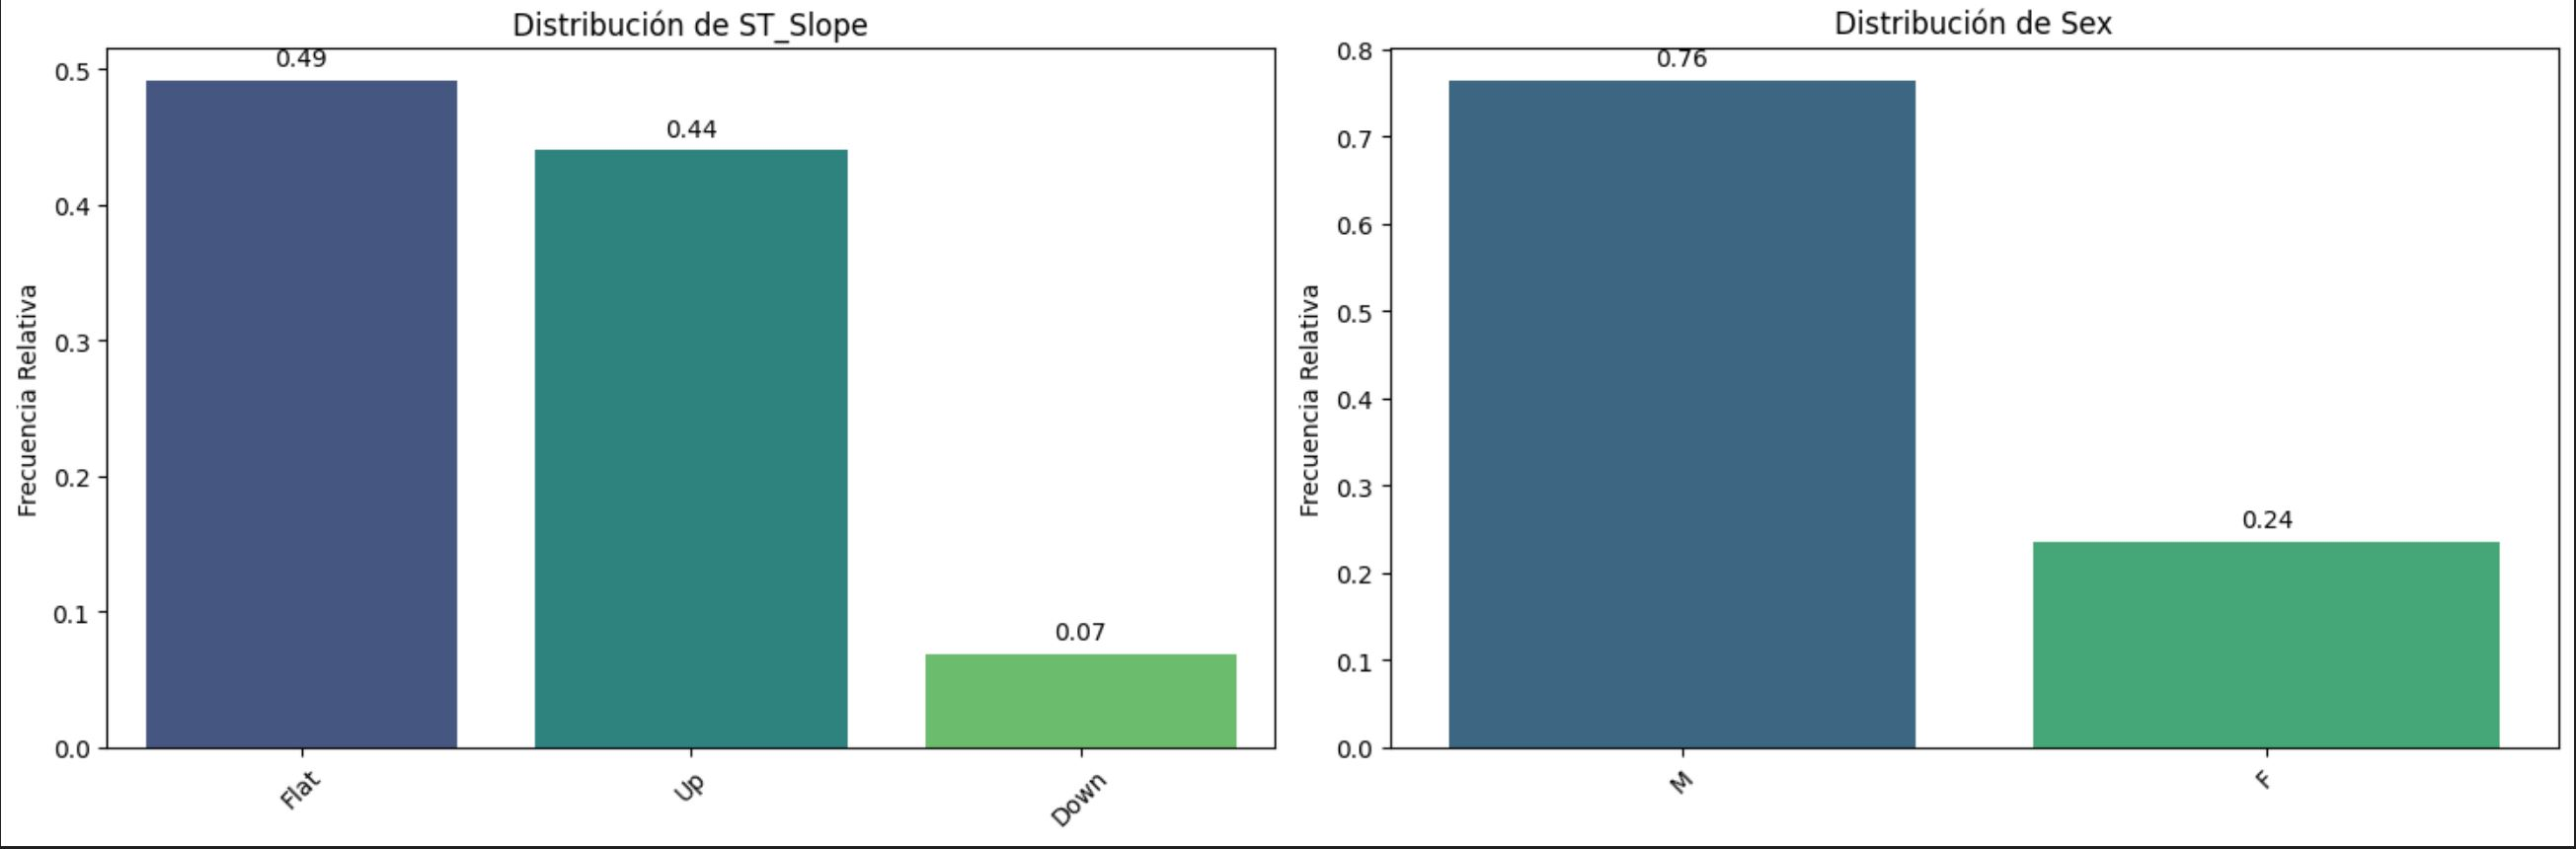

4. In the bivariate analysis with the target, both with numerical and categorical values, two graphs stand out: Age and Sex.  
In Age, we see that the minimum age to have heart disease starts from 28 years old, and most people get heart disease at the age of 50 years  

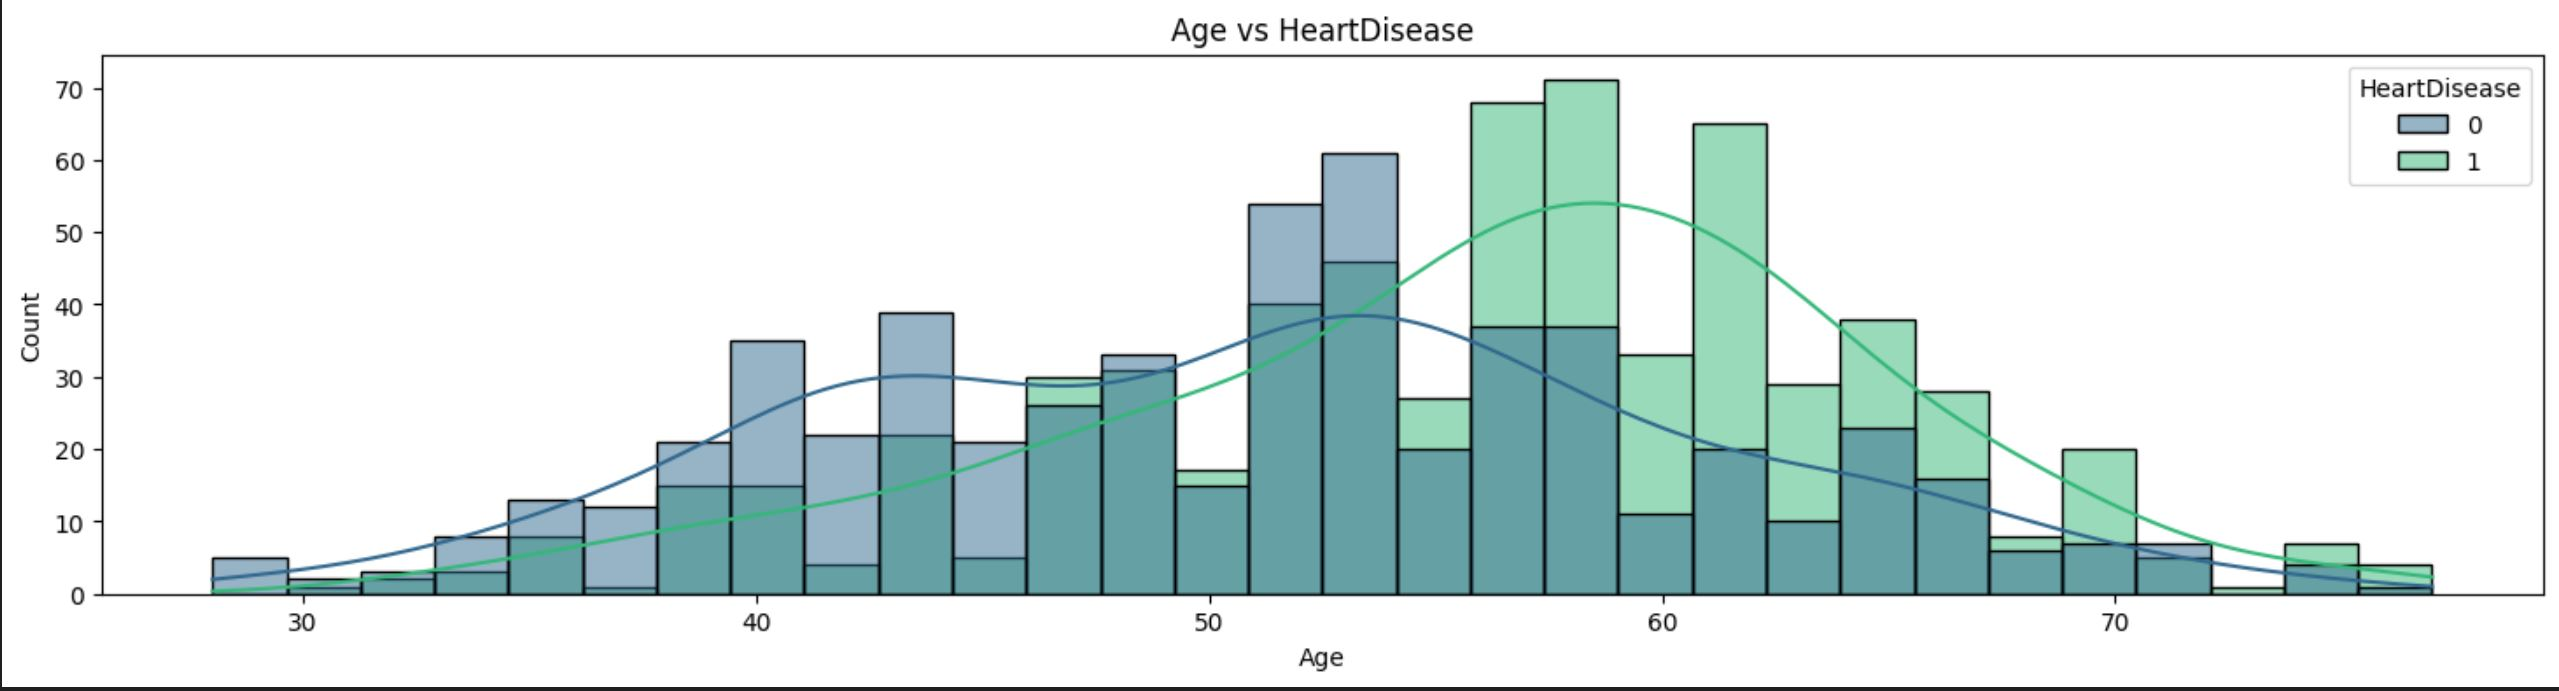  

In the Sex graph, we see that the number of men with heart disease is double the number of cases in women. 

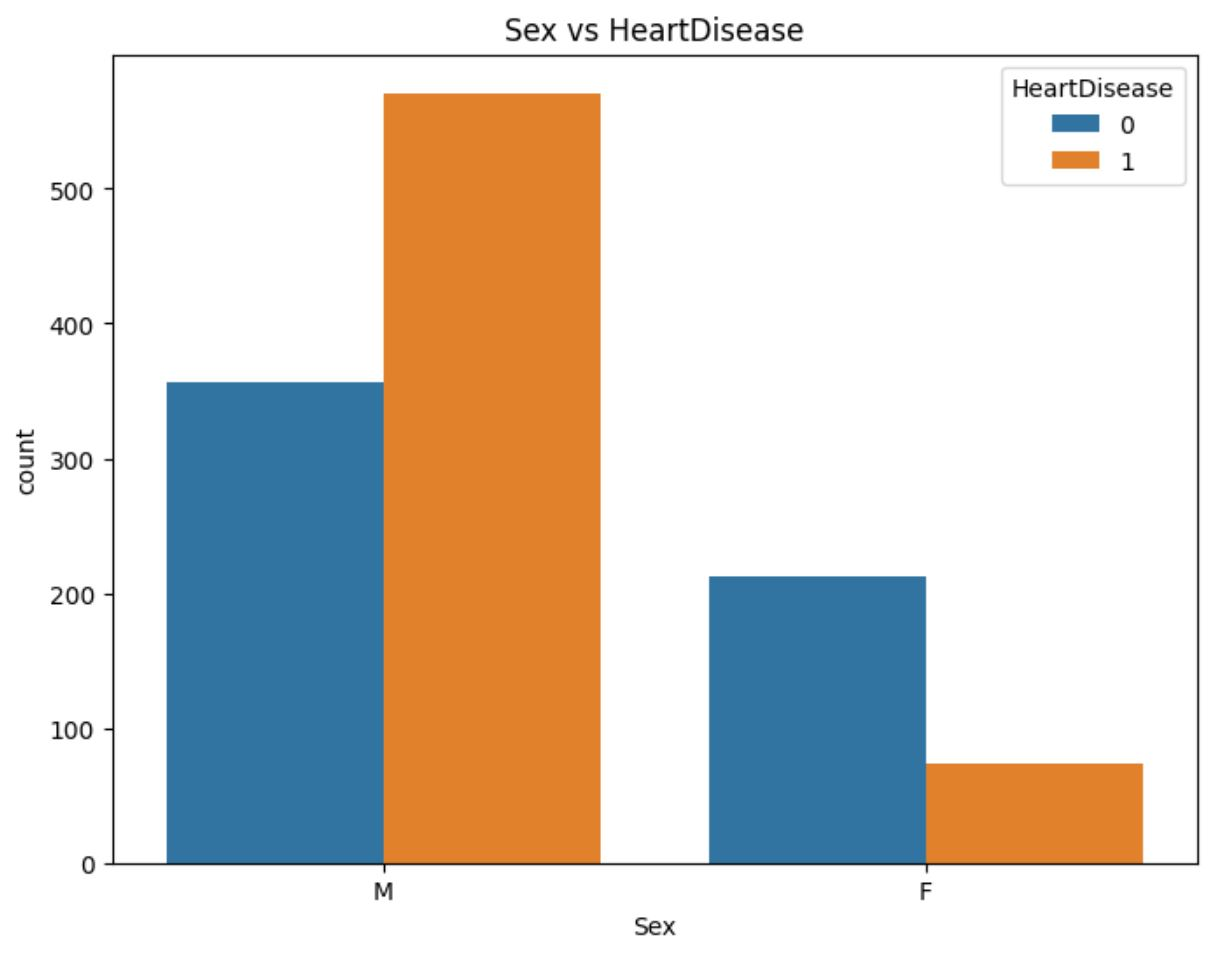  

5. To process the data later in the model, the dummy technique was used to transform categorical variables into numerical ones.This allowed us to see the correlation between all variables, especially with the target.  
Most variables have a high correlation above 10% in both positive and negative values. Destacan que la inmensa mayoría tienen una correlación alta superior al 10 % tanto en valores positivos como en negativos.  

Although there is multicollinearity among several variables, I decided to keep them all, as they are symptoms that cannot occur without the presence of others.
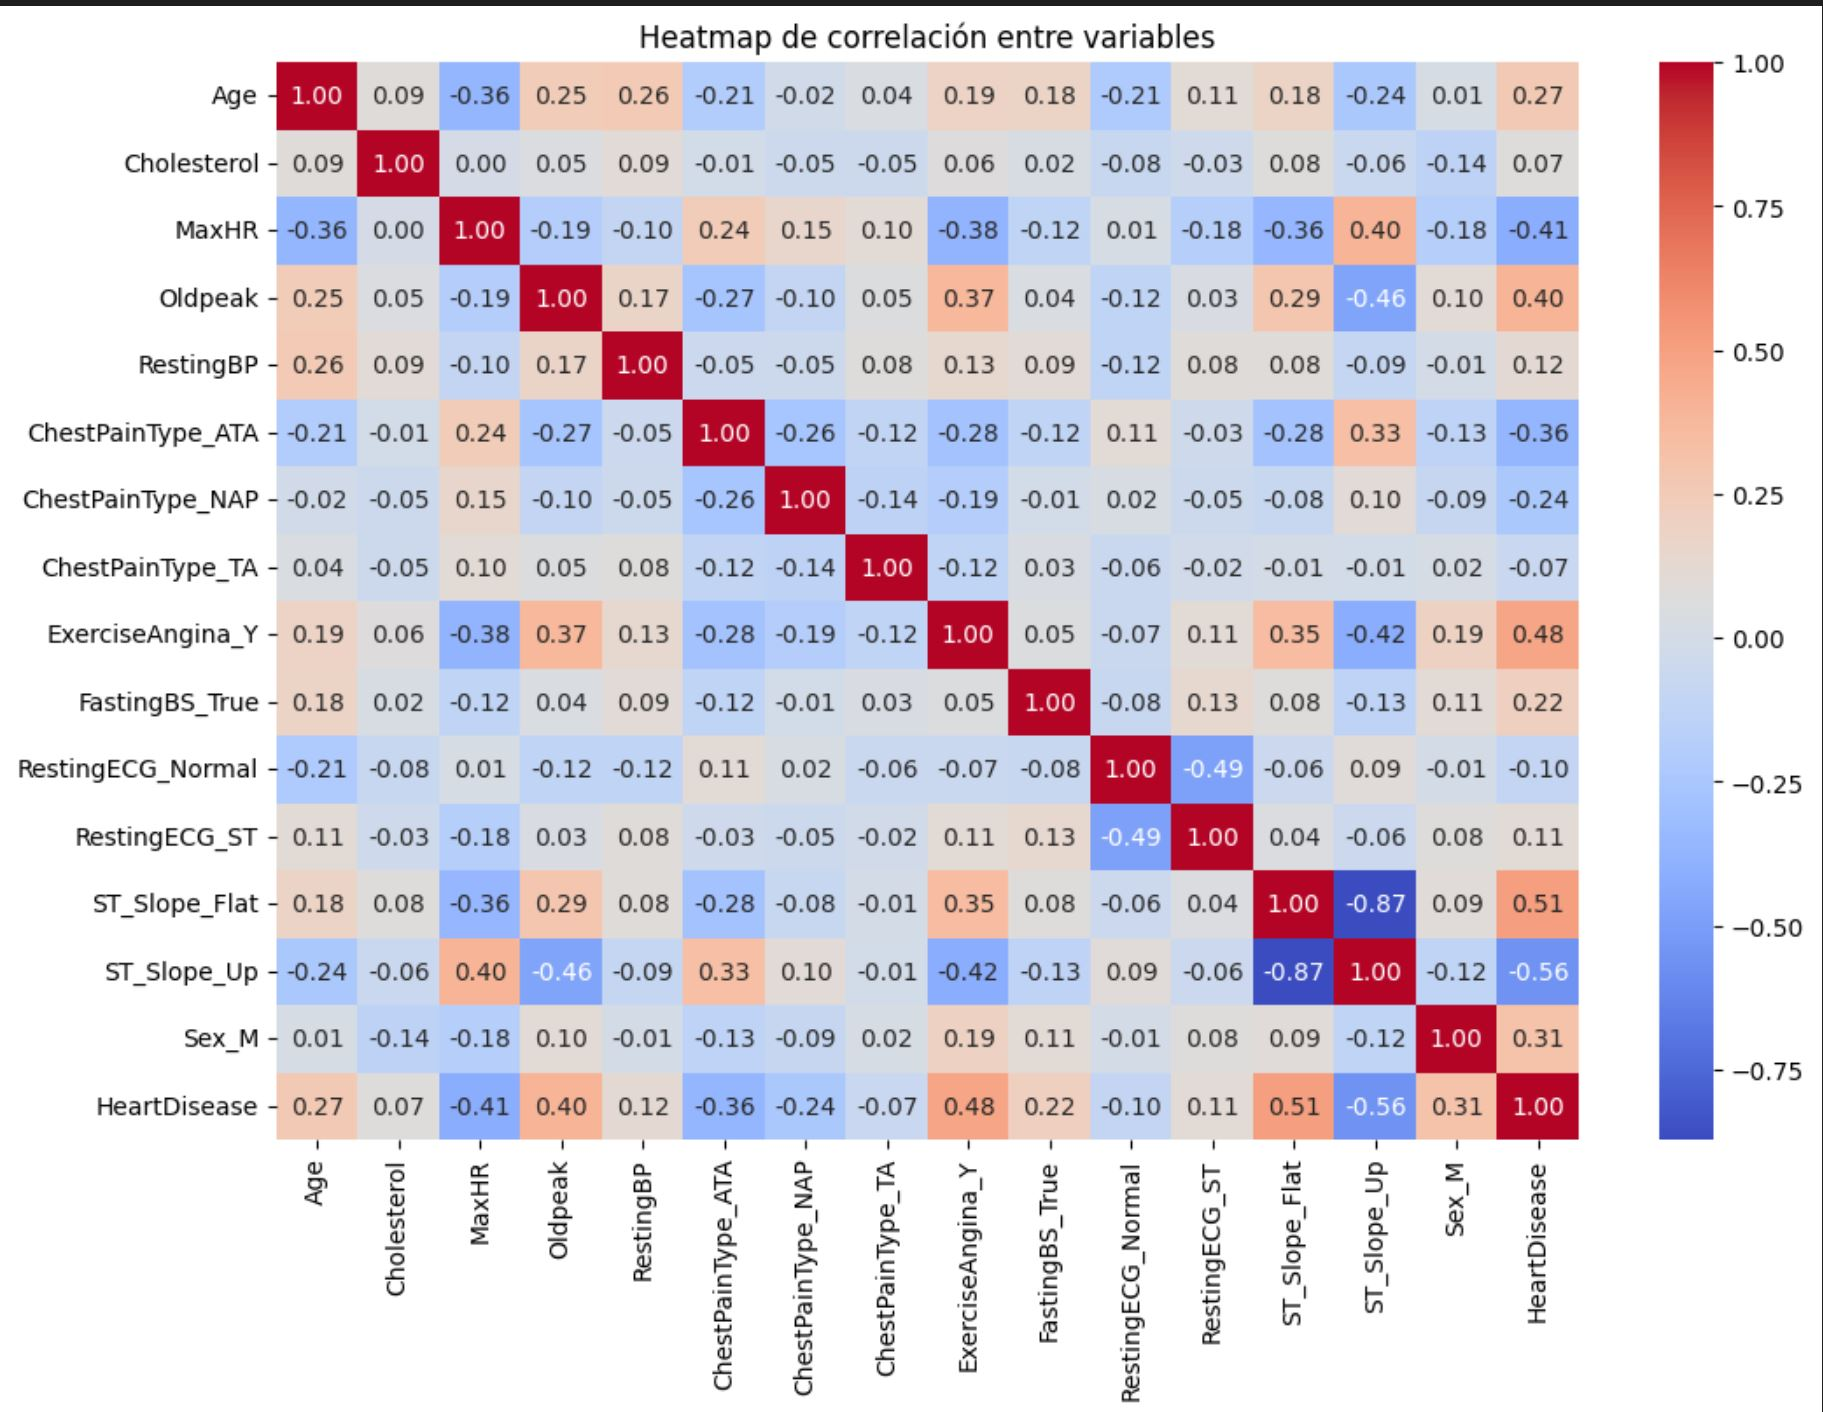

6. After processing all the data, a new dataset was generated for modeling. The file is named: 'data_final_preprocessed.csv'.

### Split and modeling

#### Training models using Machine Learning

The dataset is divided into training and testing sets. Several machine learning models are then trained to find the one that best fits the data. This section describes the process of splitting and modeling, and the entire process can be seen here: [03_Split_Modeling.ipynb](https://github.com/BrendzRdgz/Proyecto_ML/blob/main/process/03_Split_Modeling.ipynb).

The models initialized with their default hyperparameters are Logistic Regression, Decision Tree Classifier, Random Forest Classifier, XGB, LGBM, and CatBoost. After comparing all the models with cross-validation, the winning model is Random Forest with an accuracy of 0.89% obtained through cross-validation.

#### Optimization and evaluation of the model

Once the models were trained, hyperparameter optimization was performed to improve the performance of the selected model: Random Forest.  
Considering the results of the best parameters of the first trained model and its best score (0.913), I decided to try to improve the model slightly, but only managed to obtain a best score of 0.916. When conducting the study with the test set, the classification report gave the same accuracy result: 0.93. Therefore, I decided to keep the first training and save it as: 'best_rf_model.pkl'.


It is important to highlight that in the confusion matrix, the number of false negatives obtained is 5 patients.  
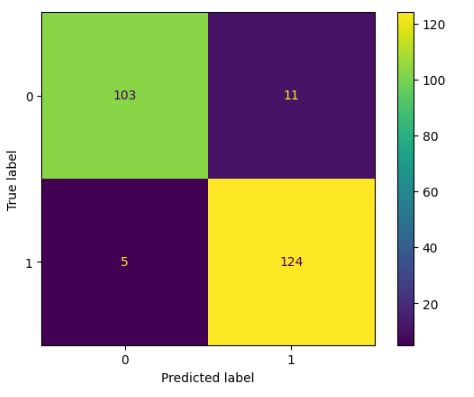  
Since the final intention of this project is to predict potential heart disease cases, I considered it important to conduct a brief study of these 5 false negatives.   
I identified the specific cases and the values of their features, but they had nothing unusual or special at first glance. The 5 patients are men aged between 41 and 60 who do have some heart disease, concluding that more attention should be paid to these types of patients.


### Conclusion

To test the model, I created new patient scenarios. This test can be found here:  [04_Models.ipynb](https://github.com/BrendzRdgz/Proyecto_ML/blob/main/process/04_Models.ipynb).

Additionally, to avoid false negatives, the probability of potential predictions is included. This incorporates the model's effectiveness in predicting heart disease and its possible applications in the medical field.  

In the future, medical professionals could provide more specific advice to patients considering early prevention of this type of disease.  

Thanks to this predictor, early detection of heart failures would be possible, thus reducing medical costs and improving quality of life. Early prevention allows for interventions that can enhance patient longevity and overall well-being.